<a href="https://colab.research.google.com/github/Madhav2008/Class132/blob/main/Data_Science_1%2C_2%2C_3_And_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files_to_upload = files.upload()

Saving main.csv to main.csv


In [ ]:
import csv
import pandas as pd

rows = []
file = open("main.csv", "r")
csvreader = csv.reader(file)

for row in csvreader:
  rows.append(row)

header = rows[0]
planetdatarows = rows[1:]

print(header)
print(planetdatarows[0])

['', 'name', 'light_years_from_earth', 'planet_mass', 'stellar_magnitude', 'discovery_date', 'planet_type', 'planet_radius', 'orbital_radius', 'orbital_period', 'eccentricity', 'solar_system_name', 'planet_discovery_method', 'planet_orbital_inclination', 'planet_density', 'right_ascension', 'declination', 'host_temperature', 'host_mass', 'host_radius']
['0', '11 Comae Berenices b', '305.0', '19.4 Jupiters', '4.74', '2007', 'Gas Giant', '1.08 x Jupiter', '1.29 AU', '326 days', '0.23', '11 Com', 'Radial Velocity', '', '', '12h20m43.03s', '+17d47m34.3s', '4742.0', '2.7', '19.0']


In [ ]:
header[0] = "row_num"

solar_system_planet_count = {}

for planetdata in planetdatarows:
  if solar_system_planet_count.get(planetdata[11]):
    solar_system_planet_count[planetdata[11]] += 1
  else:
    solar_system_planet_count[planetdata[11]] = 1

maxsolarsystem = max(solar_system_planet_count, key = solar_system_planet_count.get)
print("Solar System {} Has Maximum Planets {} Out Of All The Solar Systems We Have Discovered So Far...".format(maxsolarsystem, solar_system_planet_count[maxsolarsystem]))

Solar System KOI-351 Has Maximum Planets 8 Out Of All The Solar Systems We Have Discovered So Far...


In [ ]:
tempplanetdatarows = list(planetdatarows)

for planetdata in tempplanetdatarows:
  planetmass = planetdata[3]

  if planetmass.lower() == "unknown":
    planetdatarows.remove(planetdata)
    continue
  else:
    planetmassvalue = planetmass.split(" ")[0]
    planetmassref = planetmass.split(" ")[1]
    if planetmassref == "Jupiters":
      planetmassvalue = float(planetmassvalue) * 317.8
    planetdata[3] = planetmassvalue

  planetradius = planetdata[7]

  if planetradius.lower() == "unknown":
    planetdatarows.remove(planetdata)
    continue
  else:
    planetradiusvalue = planetradius.split(" ")[0]
    planetradiusref = planetradius.split(" ")[2]
    if planetradiusref == "Jupiter":
      planetradiusvalue = float(planetradiusvalue) * 11.2
    planetdata[7] = planetradiusvalue

print(len(planetdatarows))

hd_10180_planets = []

for planetdata in planetdatarows:
  if maxsolarsystem == planetdata[11]:
    hd_10180_planets.append(planetdata)

print(len(hd_10180_planets))
print(hd_10180_planets)

4251
7
[['3665', 'Kepler-903 b', '2704.0', '4.7', '14.615', '2016', 'Super Earth', '2.01', 'Unknown', '10.4 days', '0.0', 'KOI-351', 'Transit', '89.2', '', '18h57m44.04s', '+49d18m18.6s', '6080.0', '1.2', '1.2'], ['3824', 'KOI-142 b', '1106.0', '9.5', '13.11', '2013', 'Neptune-like', 3.4383999999999997, 'Unknown', '10.9 days', '0.06', 'KOI-351', 'Transit', '89.4', '', '18h57m44.04s', '+49d18m18.6s', '6080.0', '1.2', '1.2'], ['3825', 'KOI-142 c', '1106.0', 214.1972, '13.11', '2013', 'Gas Giant', 14.0, '0.15525 AU', '22.3 days', '0.06', 'KOI-351', 'Transit', '89.68', '', '18h57m44.04s', '+49d18m18.6s', '6080.0', '1.2', '1.2'], ['3826', 'KOI-1599.01', '3813.0', '4.6', '14.854000000000001', '2019', 'Super Earth', '1.9', '0.14728 AU', '20.4 days', '0.01', 'KOI-351', 'Transit', '89.71', '', '18h57m44.04s', '+49d18m18.6s', '6080.0', '1.2', '1.2'], ['3827', 'KOI-1599.02', '3813.0', '9', '14.854000000000001', '2019', 'Super Earth', '1.9', '0.112293 AU', '13.6 days', '0.01', 'KOI-351', 'Transit'

In [ ]:
import plotly.express as px

hd_10180_planet_masses = []
hd_10180_planet_names = []

for planetdata in hd_10180_planets:
  hd_10180_planet_masses.append(planetdata[3])
  hd_10180_planet_names.append(planetdata[1])

hd_10180_planet_masses.append(1)
hd_10180_planet_names.append("Earth")

fig = px.bar(x = hd_10180_planet_names, y = hd_10180_planet_masses)
fig.show()

In [ ]:
tempplanetdatarows = list(planetdatarows)

for planetdata in tempplanetdatarows:
  if planetdata[1].lower() == "hd 100546 b":
    planetdatarows.remove(planetdata)

planetmasses = []
planetradiuses = []
planetnames = []

for planetdata in planetdatarows:
  planetmasses.append(planetdata[3])
  planetradiuses.append(planetdata[7])
  planetnames.append(planetdata[1])

planetgravity = []

for index, name in enumerate(planetnames):
  gravity = (float(planetmasses[index])*5.972e+24) / (float(planetradiuses[index])*float(planetradiuses[index])*6371000*6371000)*6.674e-11
  planetgravity.append(gravity)

fig = px.scatter(x = planetradiuses, y = planetmasses, size = planetgravity, hover_data = [planetnames])
fig.show()

In [ ]:
lowgravityplanets = []

for index, gravity in enumerate(planetgravity):
  if gravity < 10:
    lowgravityplanets.append(planetdatarows[index])

print(len(lowgravityplanets))

1012


In [ ]:
lowgravityplanets = []

for index, gravity in enumerate(planetgravity):
  if gravity < 100:
    lowgravityplanets.append(planetdatarows[index])

print(len(lowgravityplanets))

3951


In [ ]:
print(header)

['row_num', 'name', 'light_years_from_earth', 'planet_mass', 'stellar_magnitude', 'discovery_date', 'planet_type', 'planet_radius', 'orbital_radius', 'orbital_period', 'eccentricity', 'solar_system_name', 'planet_discovery_method', 'planet_orbital_inclination', 'planet_density', 'right_ascension', 'declination', 'host_temperature', 'host_mass', 'host_radius']


In [ ]:
planettypevalue = []

for planetdata in planetdatarows:
  planettypevalue.append(planetdata[6])

print(list(set(planettypevalue)))

['Neptune-like', 'Gas Giant', 'Terrestrial', 'Super Earth']


In [ ]:
planetmasses = []
planetradiuses = []

for planetdata in lowgravityplanets:
  planetmasses.append(planetdata[3])
  planetradiuses.append(planetdata[7])

fig = px.scatter(x = planetradiuses, y = planetmasses)
fig.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



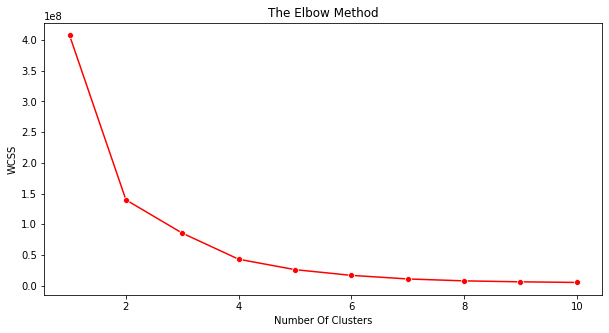

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

x = []

for index, planetmass in enumerate(planetmasses):
  templist = [planetradiuses[index], planetmass]
  x.append(templist)

wcss = []

for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init = "k-means++", random_state = 42)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

plt.figure(figsize = (10, 5))
sns.lineplot(range(1, 11), wcss, marker = "o", color = "red")
plt.title("The Elbow Method")
plt.xlabel("Number Of Clusters")
plt.ylabel("WCSS")
plt.show()

In [ ]:
planetmasses = []
planetradiuses = []
planettypes = []

for planetdata in lowgravityplanets:
  planetmasses.append(planetdata[3])
  planetradiuses.append(planetdata[7])
  planettypes.append(planetdata[6])

fig = px.scatter(x = planetradiuses, y = planetmasses, color = planettypes)
fig.show()

In [ ]:
suitableplanets = []

for planetdata in lowgravityplanets:
  if planetdata[6].lower() == "terrestrial" or planetdata[6].lower() == "super earth":
    suitableplanets.append(planetdata)

print(len(suitableplanets))

1452


In [ ]:
print(header)

['row_num', 'name', 'light_years_from_earth', 'planet_mass', 'stellar_magnitude', 'discovery_date', 'planet_type', 'planet_radius', 'orbital_radius', 'orbital_period', 'eccentricity', 'solar_system_name', 'planet_discovery_method', 'planet_orbital_inclination', 'planet_density', 'right_ascension', 'declination', 'host_temperature', 'host_mass', 'host_radius']


In [ ]:
tempsuitableplanets = list(suitableplanets)

for planetdata in tempsuitableplanets:
  if planetdata[8].lower() == "unknown":
    suitableplanets.remove(planetdata)

for planetdata in suitableplanets:
  if planetdata[9].split(" ")[1].lower() == "days":
    planetdata[9] = float(planetdata[9].split(" ")[0])
  else:
    planetdata[9] = float(planetdata[9].split(" ")[0]) * 365
  
  planetdata[8] = float(planetdata[8].split(" ")[0])

orbitalradiuses = []
orbitalperiods = []

for planetdata in suitableplanets:
  orbitalradiuses.append(planetdata[8])
  orbitalperiods.append(planetdata[9])

fig = px.scatter(x = orbitalradiuses, y = orbitalperiods)
fig.show()

In [ ]:
goldilockplanets = list(suitableplanets)
tempgoldilockplanets = list(suitableplanets)

for planetdata in tempgoldilockplanets:
  if planetdata[8] < 0.38 or planetdata[8] > 2:
    goldilockplanets.remove(planetdata)
  
print(len(suitableplanets))
print(len(goldilockplanets))

696
25


In [ ]:
planetspeeds = []

for planetdata in suitableplanets:
  distance = 2 * 3.14 * (planetdata[8] * 1.496e+9)
  time = planetdata[9] * 86400
  speed = distance / time
  planetspeeds.append(speed)

speed_supporting_planets = list(suitableplanets)
temp_speed_supporting_planets = list(suitableplanets)

for index, planetdata in enumerate(temp_speed_supporting_planets):
  if planetspeeds[index] > 200:
    speed_supporting_planets.remove(planetdata)

print(len(speed_supporting_planets))

8


In [ ]:
habitableplanets = []

for planet in speed_supporting_planets:
  if planet in goldilockplanets:
    habitableplanets.append(planet)

print(len(habitableplanets))

6


In [ ]:
finaldict = {}

for index, planetdata in enumerate(planetdatarows):
  featureslist = []
  gravity = (float(planetdata[3]) * 5.972e+24) / (float(planetdata[7]) * float(planetdata[7]) * 6371000 * 6371000) * 6.674e-11
  
  try:

    if gravity < 100:
      featureslist.append("Gravity")

  except:

    pass

  try:

    if planetdata[6].lower() == "terrestrial" or planetdata[6].lower() == "super earth":
      featureslist.append("Planet Type")

  except:

    pass
  
  try:

    if planetdata[8] > 0.38 or planetdata[8] < 2:
      featureslist.append("Goldilock")

  except:

    pass

  try:

    distance = 2 * 3.14 * (planetdata[8] * 1.496e+9)
    time = planetdata[9] * 86400
    speed = distance / time

    if speed < 200:
      featureslist.append("Speed")

  except:

    pass
  
  finaldict[index] = featureslist
  
print(finaldict)

{0: [], 1: [], 2: ['Gravity'], 3: ['Gravity'], 4: ['Gravity'], 5: [], 6: ['Gravity'], 7: ['Gravity'], 8: ['Gravity'], 9: ['Gravity'], 10: [], 11: [], 12: [], 13: [], 14: ['Gravity'], 15: ['Gravity'], 16: [], 17: [], 18: [], 19: ['Gravity'], 20: ['Gravity'], 21: ['Gravity'], 22: ['Gravity'], 23: [], 24: ['Gravity'], 25: ['Gravity'], 26: ['Gravity'], 27: ['Gravity'], 28: ['Gravity'], 29: ['Gravity', 'Planet Type', 'Goldilock'], 30: ['Gravity'], 31: ['Gravity'], 32: ['Gravity'], 33: ['Gravity'], 34: ['Gravity'], 35: [], 36: ['Gravity'], 37: ['Gravity'], 38: ['Gravity'], 39: [], 40: ['Gravity'], 41: ['Gravity'], 42: [], 43: ['Gravity'], 44: [], 45: ['Gravity'], 46: [], 47: ['Gravity'], 48: ['Gravity'], 49: ['Gravity'], 50: ['Gravity'], 51: ['Gravity'], 52: ['Gravity'], 53: ['Gravity'], 54: [], 55: ['Gravity'], 56: ['Gravity'], 57: ['Gravity'], 58: ['Gravity'], 59: [], 60: [], 61: ['Gravity'], 62: ['Gravity'], 63: ['Gravity'], 64: ['Gravity'], 65: ['Gravity'], 66: [], 67: [], 68: [], 69: []

In [ ]:
goldilockplanetscount = 0

for key, value in finaldict.items():
  if "Goldilock" in value:
    goldilockplanetscount += 1

print(goldilockplanetscount)

696


In [ ]:
speed_supporting_planets_count = 0

for key, value in finaldict.items():
  if "Speed" in value:
    speed_supporting_planets_count += 1

print(speed_supporting_planets_count)

8


In [ ]:
gravity_planet_count = 0

for key, value in finaldict.items():
  if "Gravity" in value:
    gravity_planet_count += 1

print(gravity_planet_count)

3951


In [ ]:
type_planet_count = 0

for key,value in finaldict.items():
  if "Planet Type" in value:
    type_planet_count += 1

print(type_planet_count)

1485


In [ ]:
planet_no_gravity_support = []

for planetdata in planetdatarows:
  if planetdata not in lowgravityplanets:
    planet_no_gravity_support.append(planetdata)

type_no_gravity_planet_count = 0

for planetdata in planet_no_gravity_support:
  if planetdata[6].lower() == "terrestrial" or planetdata[6].lower() == "super earth":
    type_no_gravity_planet_count += 1

print(type_no_gravity_planet_count)
print(type_planet_count - type_no_gravity_planet_count)

33
1452


In [ ]:
finaldict = {}

for index, planetdata in enumerate(planetdatarows):
  featureslist = []
  gravity = (float(planetdata[3]) * 5.972e+24) / (float(planetdata[7]) * float(planetdata[7]) * 6371000 * 6371000) * 6.674e-11
  
  try:
    if gravity < 100:
      featureslist.append("Gravity")
    planetdata.append(gravity)
  except:
    planetdata.append("Unknown")

  try:
    if planetdata[6].lower() == "terrestrial" or planetdata[6].lower() == "super earth":
      featureslist.append("Planet Type")
  except:
    pass
  
  try:
    if float(planetdata[8].split(" ")[0]) > 0.38 and float(planetdata[8].split(" ")[0]) < 2:
      featureslist.append("Goldilock")
  except:
    try:
      if planetdata[8] > 0.38 and planetdata[8] < 2:
        featureslist.append("Goldilock")
    except:
      pass

  try:
    try:
      distance = 2 * 3.14 * (float(planetdata[8].split(" ")[0]) * 1.496e+9)
    except:
      try:
        distance = 2 * 3.14 * (float(planetdata[8]) * 1.496e+9)
      except:
        pass
    try:
      time, unit = planetdata[9].split(" ")[0], planetdata[9].split(" ")[1]
      if unit.lower() == "days":
        time = float(time)
      else:
        time = float(time) * 365
    except:
      time = planetdata[9]
    time = time * 86400
    speed = distance / time
    if speed < 200:
      featureslist.append("Speed")
    planetdata.append(speed)
  except:
    planetdata.append("Unknown")

  finaldict[planetdata[1]] = featureslist
  
print(finaldict)

{'11 Comae Berenices b': ['Goldilock'], '11 Ursae Minoris b': ['Goldilock'], '14 Andromedae b': ['Gravity', 'Goldilock'], '14 Herculis b': ['Gravity', 'Speed'], '16 Cygni B b': ['Gravity', 'Goldilock'], '18 Delphini b': [], '1RXS J160929.1-210524 b': ['Gravity', 'Speed'], '24 Bootis b': ['Gravity'], '24 Sextantis b': ['Gravity', 'Goldilock'], '24 Sextantis c': ['Gravity'], '2MASS J01033563-5515561 AB b': ['Speed'], '2MASS J01225093-2439505 b': ['Speed'], '2MASS J02192210-3925225 b': ['Speed'], '2MASS J04414489+2301513 b': ['Speed'], '2MASS J12073346-3932539 b': ['Gravity', 'Speed'], '2MASS J19383260+4603591 b': ['Gravity', 'Goldilock'], '2MASS J21402931+1625183 A b': ['Speed'], '2MASS J22362452+4751425 b': ['Speed'], '30 Arietis B b': ['Goldilock'], '42 Draconis b': ['Gravity', 'Goldilock'], '47 Ursae Majoris b': ['Gravity'], '47 Ursae Majoris c': ['Gravity', 'Speed'], '47 Ursae Majoris d': ['Gravity', 'Speed'], '4 Ursae Majoris b': ['Goldilock'], '51 Eridani b': ['Gravity', 'Speed'], 

In [ ]:
goldilockplanetscount = 0

for key, value in finaldict.items():
  if "Goldilock" in value:
    goldilockplanetscount += 1

print(goldilockplanetscount)

414


In [ ]:
goldilock_gravity_type_count = 0

for key, value in finaldict.items():
  if "Goldilock" in value and "Planet Type" in value and "Gravity" in value:
    goldilock_gravity_type_count += 1

print(goldilock_gravity_type_count)

24


In [ ]:
speed_planet_count = 0

for key, value in finaldict.items():
  if "Speed" in value:
    speed_planet_count += 1

print(speed_planet_count)

507


In [ ]:
speed_goldilock_gravity_type_count = 0

for key, value in finaldict.items():
  if "Goldilock" in value and "Planet Type" in value and "Gravity" in value and "Speed" in value:
    speed_goldilock_gravity_type_count += 1

print(speed_goldilock_gravity_type_count)

6


In [ ]:
finalplanetlist = []

for planetdata in planetdatarows:
  tempdict = {
      "name" : planetdata[1],
      "distance_from_earth" : planetdata[2],
      "planet_mass" : planetdata[3],
      "planet_type" : planetdata[6],
      "planet_radius" : planetdata[7],
      "distance_from_their_sun" : planetdata[8],
      "orbital_period" : planetdata[9],
      "gravity" : planetdata[20],
      "orbital_speed" : planetdata[21],
  }
  tempdict["Specifications"] = finaldict[planetdata[1]]
  finalplanetlist.append(tempdict)

print(finalplanetlist)

[{'name': '11 Comae Berenices b', 'distance_from_earth': '305.0', 'planet_mass': 6165.32, 'planet_type': 'Gas Giant', 'planet_radius': 12.096, 'distance_from_their_sun': '1.29 AU', 'orbital_period': '326 days', 'gravity': 413.7736760058701, 'orbital_speed': 430.27845944103615, 'Specifications': ['Goldilock']}, {'name': '11 Ursae Minoris b', 'distance_from_earth': '410.0', 'planet_mass': 4684.372, 'planet_type': 'Gas Giant', 'planet_radius': 12.208, 'distance_from_their_sun': '1.53 AU', 'orbital_period': '1.4 years', 'gravity': 308.6406510315985, 'orbital_speed': 325.57273320287027, 'Specifications': ['Goldilock']}, {'name': '14 Andromedae b', 'distance_from_earth': '247.0', 'planet_mass': 1525.44, 'planet_type': 'Gas Giant', 'planet_radius': 12.879999999999999, 'distance_from_their_sun': '0.83 AU', 'orbital_period': '185.8 days', 'gravity': 90.293023418143, 'orbital_speed': 485.74672088665625, 'Specifications': ['Gravity', 'Goldilock']}, {'name': '14 Herculis b', 'distance_from_earth':